In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ecomm = pd.read_csv('E_Comm/data.csv',encoding = 'ISO-8859-1')

## Data Formating

In [3]:
ecomm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
ecomm.shape

(541909, 8)

In [5]:
import datetime as dt

In [6]:
ecomm['InvoiceDate'] = pd.to_datetime(ecomm['InvoiceDate'],format='%m/%d/%Y %H:%M')

## Data Cleaning

In [9]:
ecomm.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
np.where(ecomm.CustomerID.isnull(),1,0).mean() #25 % of customer ID'sare missing

0.24926694334288599

Since these are CIS ID, there is no way of replacing them with anything valuable, we would have to drop a quarterof rows

In [11]:
ecomm.dropna(inplace=True)

In [12]:
ecomm.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### Since datset has cancelled invoices also, let's removve them for now

In [13]:
ecomm.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
ecomm.loc[ecomm.Quantity < 0,:] # We'll remove these rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [15]:
ecomm = ecomm.loc[ecomm.Quantity >= 0,:]

In [16]:
ecomm.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
sb.set_style = 'whitegrid'

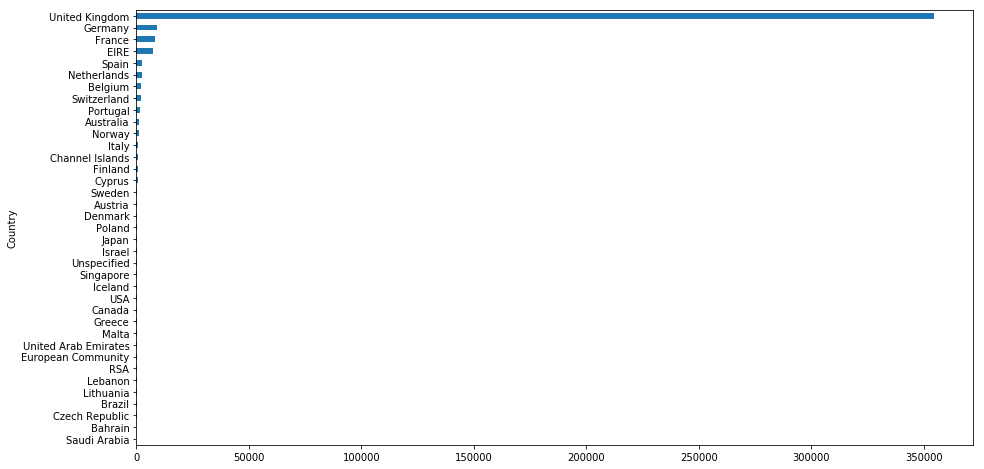

In [30]:
plt.subplots(figsize=(15,8))
ecomm.groupby(by=['Country'])['InvoiceNo'].count().sort_values().plot(kind='barh')
# Most number of orders are from UK, which isn't a ssurprise as store is UK based

In [31]:
ecomm['amount'] = ecomm.UnitPrice * ecomm.Quantity

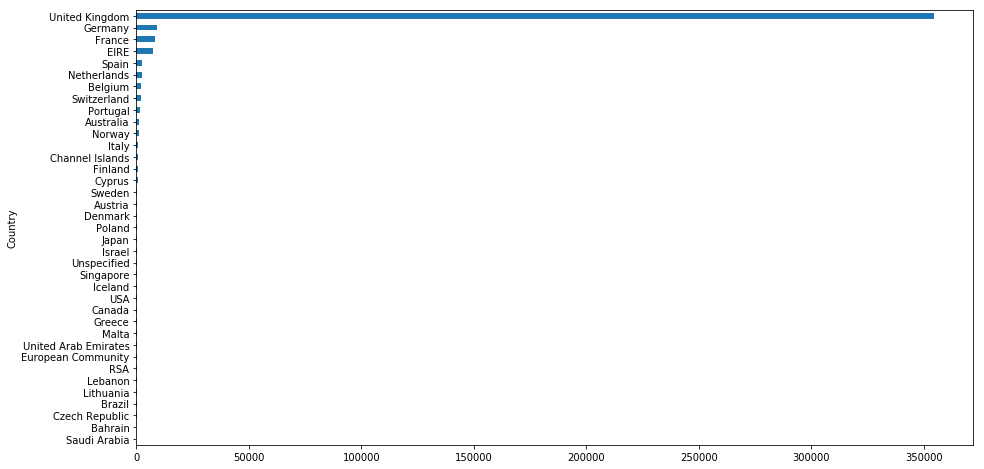

In [32]:
# Most number of customers similarly should be from UK
plt.subplots(figsize=(15,8))
ecomm.groupby(by=['Country'])['CustomerID'].count().sort_values().plot(kind='barh')
# Most number of orders are from UK, which isn't a ssurprise as store is UK based

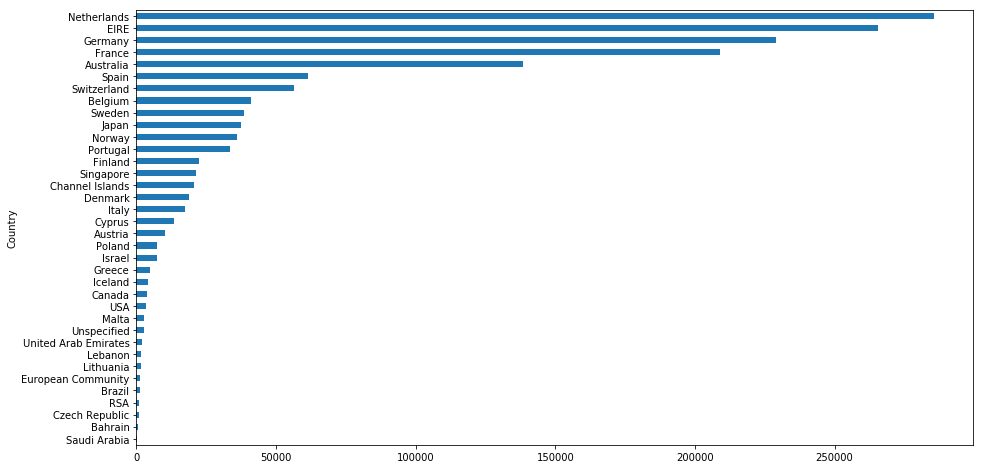

In [34]:
# Will exclude UK from forward analysis, since profit will also be from UK
plt.subplots(figsize=(15,8))
ecomm.loc[ecomm.Country != 'United Kingdom'].groupby(by=['Country'])['amount'].sum().sort_values().plot(kind='barh')

# NEtherlands is a surprise, wasexpecting Germany or France

In [40]:
# Top 10 customers who order the most are
ecomm.groupby(by=['CustomerID'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
14646.0    2080
13089.0    1818
13263.0    1677
14298.0    1637
Name: InvoiceNo, dtype: int64

In [42]:
# Top 10 customers who givev most revnue
ecomm.groupby(by=['CustomerID'])['amount'].sum().sort_values(ascending=False).head(10)

#Surprisingly some customers are different, maybe these are wholesale customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: amount, dtype: float64

### Since Data is Just of a Year, nothing conclusive of seasonal trends can be said 

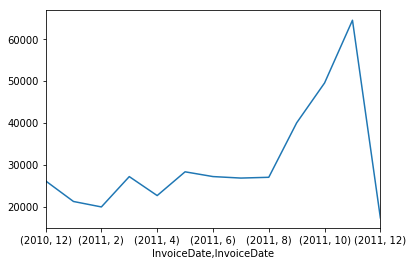

In [51]:
ecomm.groupby(by=[ecomm.InvoiceDate.dt.year,ecomm.InvoiceDate.dt.month])['InvoiceNo'].count().plot()
# Orders have increased during holidays, common pattern in Sales 

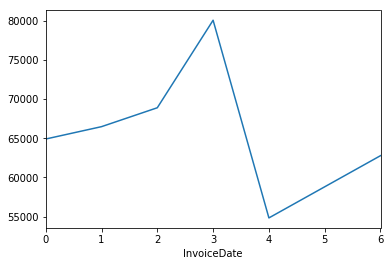

In [53]:
ecomm.groupby(by=[ecomm.InvoiceDate.dt.weekday])['InvoiceNo'].count().plot()

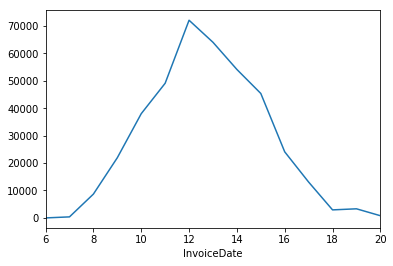

In [54]:
ecomm.groupby(by=[ecomm.InvoiceDate.dt.hour])['InvoiceNo'].count().plot() #Orders are placed betwwen 6AM to 8PM only and 
# orders are mostly during afternoon (lunch hous maybe)

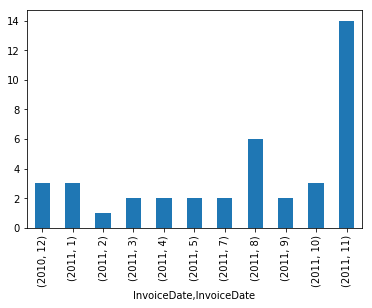

In [57]:
# We saw that min value of UnitPrice was 0, implying free items
ecomm.loc[ecomm.UnitPrice == 0].groupby(by=[ecomm.InvoiceDate.dt.year,ecomm.InvoiceDate.dt.month])['InvoiceNo'].count().plot(kind='bar')
